In [1]:
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#Carregar o modelo
from keras.models import load_model
#salvar/carregar arquivos em diferentes formatos
import joblib



2022-08-08 17:31:32.826355: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-08 17:31:32.829412: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens

modelo_maior_erro = load_model('/data/results/results_A549/14_model__A549_regressao_maior_erro_18_PACIEN_500_2022-6-29.h5')
modelo_maior_erro

2022-08-08 17:31:46.050155: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-08 17:31:46.054858: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-08 17:31:46.055258: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-08 17:31:46.056698: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a8bce4a08e2b): /proc/driver/nvidia/version does not exist
2022-08-08 17:31:46.065544: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [3]:
#71 IMAGENS SEPARADAS RANDOMICAMENTE - 40% TESTE
X_test_maior_erro = joblib.load('/data/results/results_A549/15_images_de_X_test_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz') #carregando arquivo
X_test_maior_erro.shape

(71, 200, 200, 3)

In [7]:
#71 ROTULOS IMAGENS EM X
y_test_maior_erro = joblib.load('/data/results/results_A549/16_images_de_y_test_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz') #carregando arquivo
y_test_maior_erro.shape

(71,)

In [8]:
#ROTULOS SALVOS EM LISTA
lista_observado_maior_erro = list(y_test_maior_erro)
len(lista_observado_maior_erro)

71

In [9]:
#PREDIÇÃO SALVO EM LISTA
dados_prev = modelo_maior_erro.predict(X_test_maior_erro) #valores preditos usando .predict
lista_previsto_maior_erro = dados_prev.flatten().tolist() #.flatten converte as imagens em unico array/.tolist criando lista a partir de dados em formato array
len(lista_previsto_maior_erro) #print

2022-08-08 17:33:25.286605: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-08 17:33:25.317229: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800005000 Hz
2022-08-08 17:33:25.662646: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 15360000 exceeds 10% of free system memory.
2022-08-08 17:33:25.677396: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 160579584 exceeds 10% of free system memory.
2022-08-08 17:33:36.056682: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 40144896 exceeds 10% of free system memory.
2022-08-08 17:33:36.344086: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 77078528 exceeds 10% of free system memory.
2022-08-08 17:33:36.443077: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18874368 exceeds 10% of free system memory.


71

In [10]:
import pandas as pd #Chamando pandas para criar Dataframe
from scipy.stats.stats import pearsonr as stats #importando a biblioteca para gráfico de correlação

In [11]:
#DATAFRAME - ORGANIZAÇÃO DAS LISTAS
#COLUNA 1 ROTULO/ COLUNA 2 PREDITO
df_maior_erro = pd.DataFrame(zip(lista_observado_maior_erro,lista_previsto_maior_erro), 
                             columns = ['Observed values','Lista preditos'])
df_maior_erro.tail()

,Observed values,Lista preditos
66,950,941.773682
67,899,1009.786804
68,1041,949.071838
69,945,937.210266
70,1124,998.819641


In [12]:
#ARREDONDANDO O PREDITO ('lista preditos')
teste = round(df_maior_erro['Lista preditos'],2) #arrendodando para duas casas
df_maior_erro['Predicted values'] = teste #criando a coluna com esses valores
df_maior_erro.head() #5 primeiros valores

,Observed values,Lista preditos,Predicted values
0,963,887.128784,887.13
1,841,971.162720,971.16
2,821,880.695007,880.70
3,876,970.960693,970.96
4,944,714.504517,714.50


In [13]:
#REORGANIZANDO AS COLUNAS
df_maior_erro = df_maior_erro.reindex(columns=['Observed values','Predicted values','Lista preditos']) #reindex para alterar a ordem das colunas
df_maior_erro.head()

,Observed values,Predicted values,Lista preditos
0,963,887.13,887.128784
1,841,971.16,971.162720
2,821,880.70,880.695007
3,876,970.96,970.960693
4,944,714.50,714.504517


In [14]:
#BIBLIOTECA CORRELAÇÃO
from scipy.stats.stats import spearmanr as spearman #importando a biblioteca para gráfico de correlação


In [15]:
df_maior_erro = df_maior_erro[df_maior_erro['Observed values'] > 300]


In [16]:
#CALCULO DE CORRELAÇÃO
col1_obt = 0 #dados observados - Observed values
col2_prev = 1 #valores preditos - Predicted values
pear_pos_maior_erro = stats(df_maior_erro[df_maior_erro.columns[col1_obt]], 
                            df_maior_erro[df_maior_erro.columns[col2_prev]])


<Figure size 1080x1080 with 0 Axes>

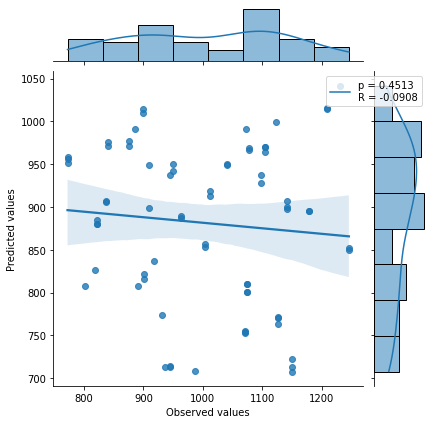

In [17]:
plt.figure(figsize=(15,15)) #tam figura

sns.jointplot(
    x=df_maior_erro.columns[col1_obt], #eixo x - valores observados
    y=df_maior_erro.columns[col2_prev], #eixo y - valores preditos
    kind='reg', #regressão
    data=df_maior_erro #dados da dataframe
)

#condicional para o valor de p
if pear_pos_maior_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(round(pear_pos_maior_erro[1],4)) + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e r

plt.savefig(
    fname="/results/Correlation_greatest_error_A549.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)